<a href="https://colab.research.google.com/github/wamaithakamande/Financial-inlusion-project-one--LDA/blob/main/FINANCIAL_INCLUSION__PROJECT_ONE_16_10_22_v3_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#problem Statement


The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account



# Metrics of success


The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Access to a bank account is the indicator for financial incluson

#Experimental Design


1. This first step of this analysis will be loading the dataset
2. Next I will load the appropriate libraries
3. Then taking the necessary steps to clean the data
4. Finally I will carry out Univariate, Bivariate data analysis, Multivariate analysis





# Column Name 


*  Country - Country interviewee is in.
*  Year -Year survey was done in.
* uniqueid -Unique identifier for each interviewee
* has bank account -
*  location type -type of location: Rural, Urban
* cell phone access -If interviewee has access to a cellphone: Yes, No
* household size-Number of people living in one house
* respondent age-The age of the interviewee
* gender of respondent-Gender of interviewee: Male, Female
* the relationship with head- The intervieweeâ€™s relationship with the head of the house:Head of Household, Spouse
* marital status- Child, Parent, Other relative, Other non-relatives, Dont know
* level of education- Highest level of education: No formal education, Primary education, Secondary education
* type of job- Vocational/Specialised training, Tertiary education, Other/Dont know/RTA


#Exploring the Data set

In [7]:
#Importing the Appropriate Libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt


In [10]:
#loading the data set

Financial = pd.read_csv("/content/Financial Dataset - 1 (1).csv")
Financial.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
Financial.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [11]:
# inspecting the data
Financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [12]:
# checking for null values

In [13]:
Financial.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [14]:
#checking for duplicated values
Financial.duplicated().sum()


0

In [15]:
#renaming columns for consistency
Financial.rename(columns ={'Has a Bank account': 'has_bank_account',
'Type of Location' : 'type_of_location',
'Cell Phone Access': 'cell_phone_access',
'Respondent Age':'respondent_age',
'The Relationship with head':'relationship_with_head',
'Level of Education': 'level_of_education',
'Type of Job':'type_of_job'}, inplace=True)

In [17]:
#checking whether the change in column name was effectively changed
Financial.head()

,country,year,uniqueid,has_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [18]:
#describig data
Financial.describe()

,year,household_size,respondent_age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# External  Data Validation
Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here. 
This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

FinAccess Kenya 2018. [https://www.fsdkenya.org/blogs-publications/publications/2018-annual-report/]


Finscope Rwanda 2016. [http://www.statistics.gov.rw/publication/finscope-rwanda-2016] (Links to an external site.)

Finscope Tanzania 2017. [https://www.fsdt.or.tz/finscope/] (Links to an external site.)

Finscope Uganda 2018. [https://fsduganda.or.ug/finscope-2018-survey-rep]


#Data Cleaning

In [19]:
#drop null values 
Financial2 =Financial.dropna()

In [20]:
Financial2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   has_bank_account        23343 non-null  object 
 4   type_of_location        23343 non-null  object 
 5   cell_phone_access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   respondent_age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  type_of_job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [21]:
Financial2.drop(columns='uniqueid')

,country,year,has_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


The data had no duplicated values. 
We dropped Null values as dropping them would not cause major significant changes to the data set.
we dropped the uniqueid since there are too many unique values.  and will not have an effect on the data to be analysed

# Univariate Analysis

Text(0.5, 1.0, 'Country distribution')

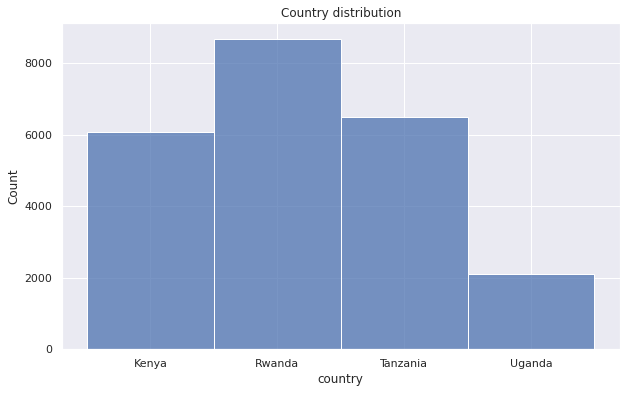

In [22]:
#country of residence of the respondence
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='country')
ax.set_title('Country distribution')



We are observing an almost normally  distributed respondents.  Rwanda and Tanzania has the majority of the respondent. Uganda has the least.


Text(0.5, 1.0, ' Year ')

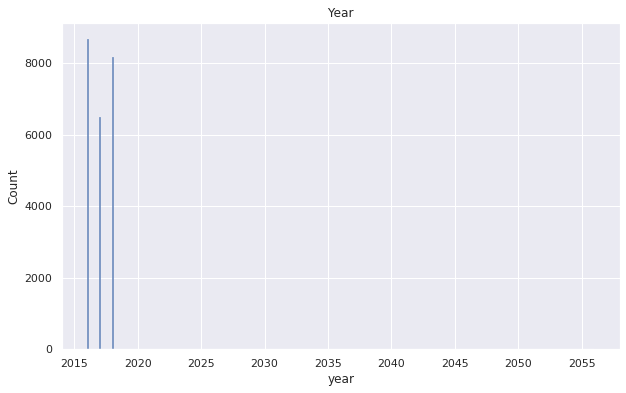

In [23]:
#year they were interviewed
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='year')
ax.set_title(' Year ')

Text(0.5, 1.0, ' Total no of peole with bank account ')

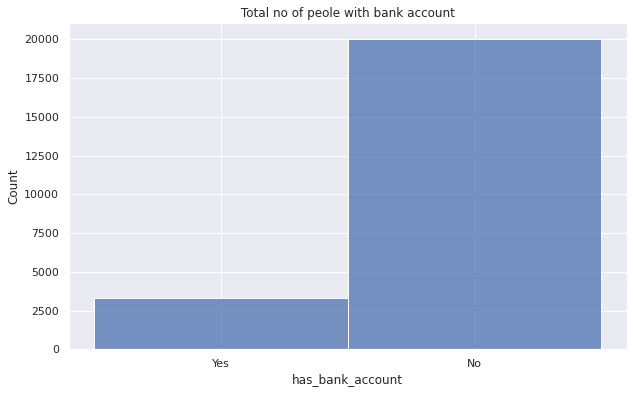

In [24]:

#Access to a bank account
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='has_bank_account')
ax.set_title(' Total no of peole with bank account ')

Majority of the respondents din't have a bank account.

In [25]:
#Total no. respondent with access  to bank account per country
pd.crosstab(Financial2.country, Financial2.has_bank_account.count())

col_0,23343
country,
Kenya,6064
Rwanda,8684
Tanzania,6500
Uganda,2095


Text(0.5, 1.0, 'location ditribution of respondent ')

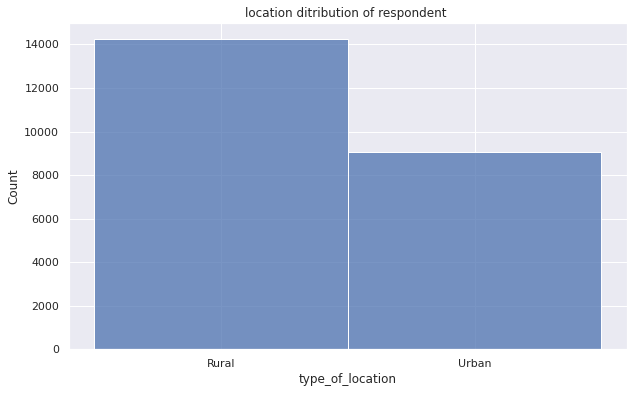

In [26]:
#where the audience are located
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='type_of_location')
ax.set_title('location ditribution of respondent ')

Most of the respondents were in rural areas.

Text(0.5, 1.0, ' access to a cell  phone ')

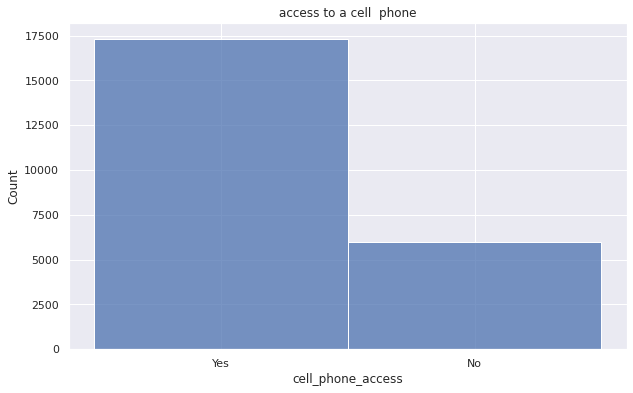

In [27]:

# access to a cell phone
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='cell_phone_access')
ax.set_title(' access to a cell  phone ')

Majority of the audience has access to mobile phones.

Text(0.5, 1.0, ' House hold size ')

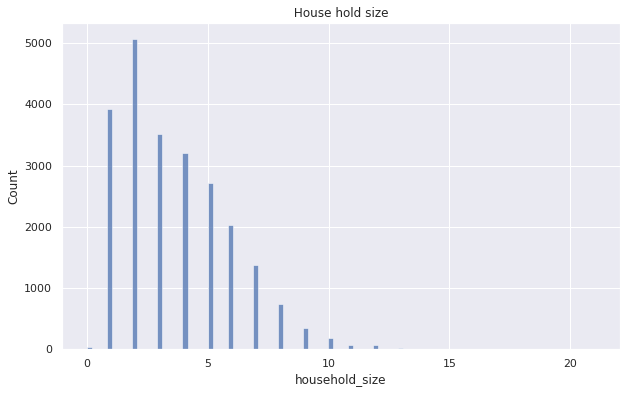

In [28]:
#house hold size of the respondent
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='household_size')
ax.set_title(' House hold size ')

Most of our respondents came from a fairly small households of between 1-5 members.


Text(0.5, 1.0, 'Respondent age ')

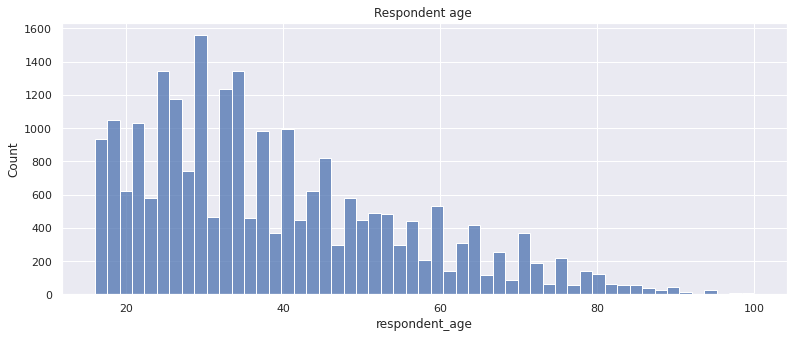

In [29]:
#age of the respondent
plt.figure(figsize=(13,5))
ax = sns.histplot(Financial2, x='respondent_age')
ax.set_title('Respondent age ')

Most respondent were between the ages of 18-45. 

26 years was the highest responders


Text(0.5, 1.0, ' Respondent by Gender ')

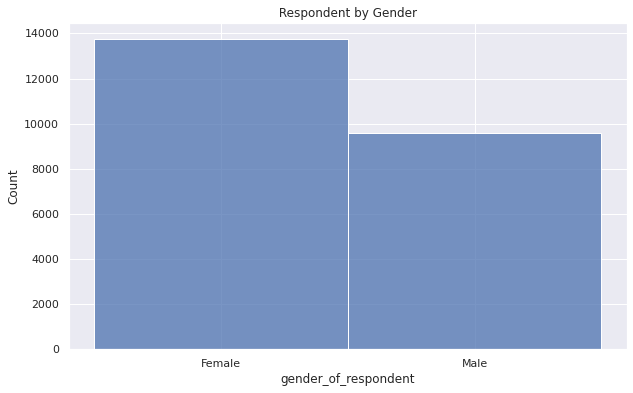

In [30]:
# Gender of respondent
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='gender_of_respondent')
ax.set_title(' Respondent by Gender ')

Majority of the respondents were female.


Text(0.5, 1.0, 'Respondents relationship with head ')

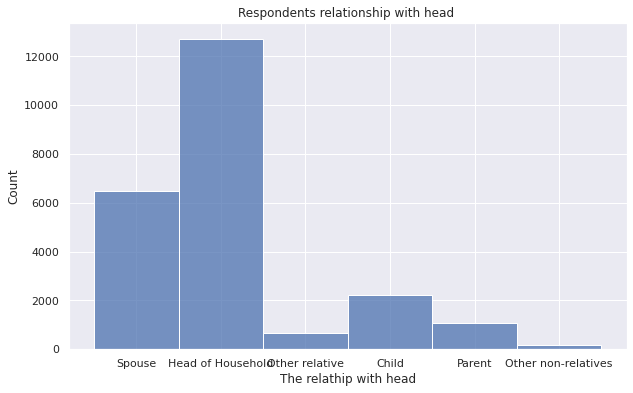

In [31]:
#relationship with head
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='The relathip with head')
ax.set_title('Respondents relationship with head ')

Most of the respondents were the head of the household.

Text(0.5, 1.0, ' marital status of respondent')

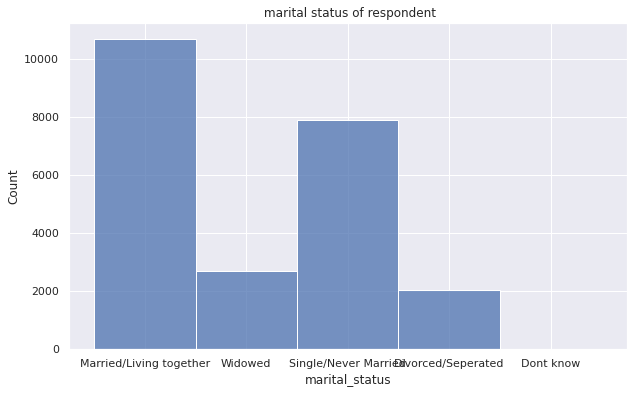

In [32]:
#respondents marital status
plt.figure(figsize=(10,6))
ax = sns.histplot(Financial2, x='marital_status')
ax.set_title(' marital status of respondent')

Most respondents were couples.


Text(0.5, 1.0, 'Respondents education level ')

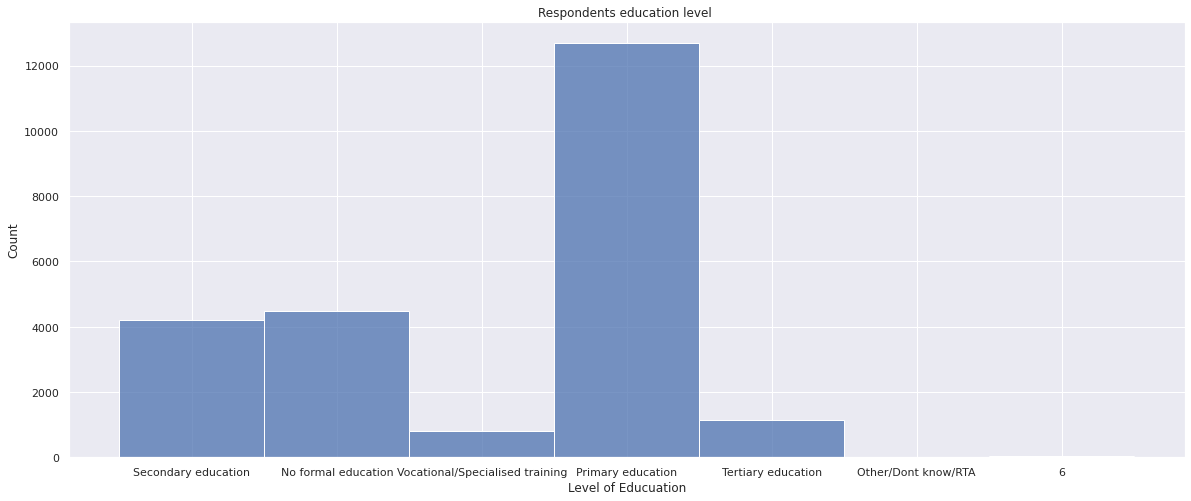

In [33]:
#level of education
plt.figure(figsize=(20,8))
ax = sns.histplot(Financial2, x='Level of Educuation')
ax.set_title('Respondents education level ')

primary school level was the highest education status of most of the respondent.


Text(0.5, 1.0, ' Type of Job  ')

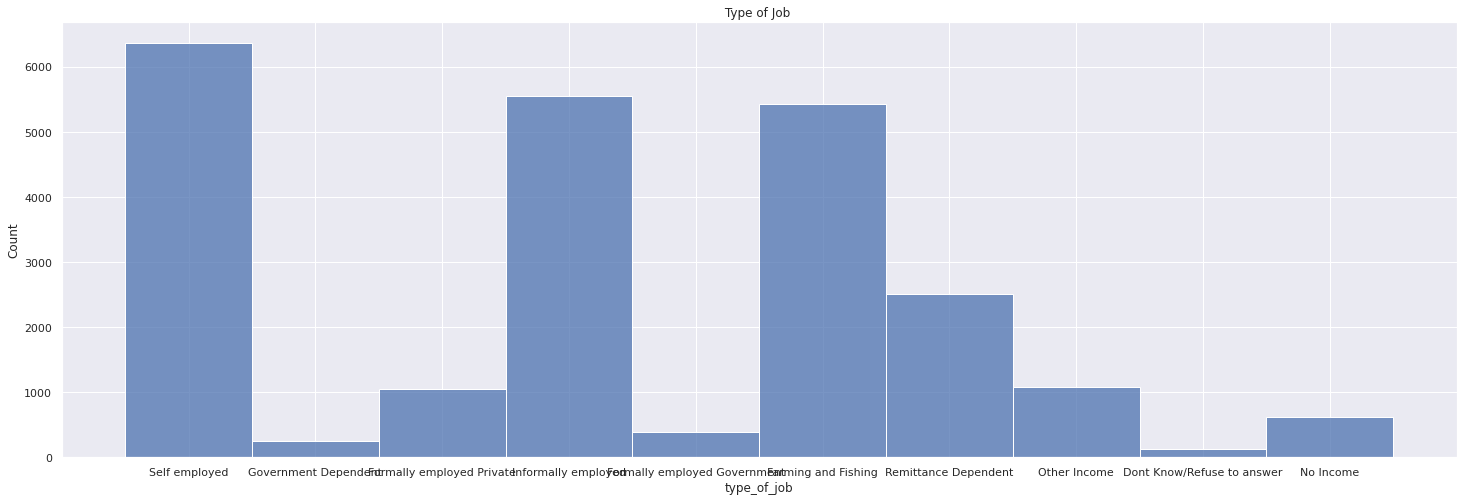

In [34]:
#type of job
plt.figure(figsize=(25,8))
ax = sns.histplot(Financial2, x='type_of_job')
ax.set_title(' Type of Job  ')

Most respondents were self employed and private informally employed. They also practised farming and fish farming

#Bivariate analysis

Text(0.5, 1.0, ' Country ')

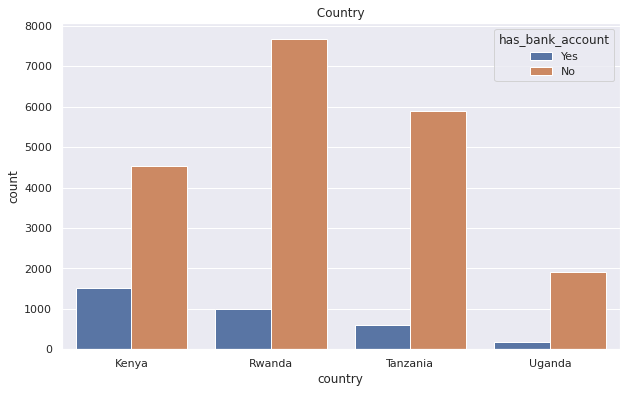

In [35]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='country', hue = 'has_bank_account')
ax.set_title(' Country ')

Most of the respondent in all countries din't have a bank account

Text(0.5, 1.0, ' year interviewed ')

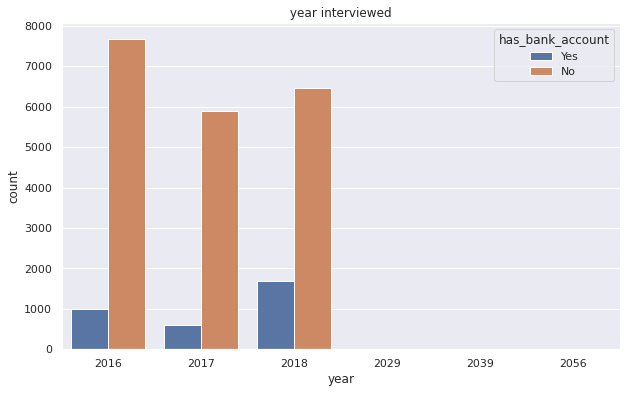

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='year', hue = 'has_bank_account')
ax.set_title(' year interviewed ')

Most respondent were interviewied in 2016.

Text(0.5, 1.0, ' location of the respondent ')

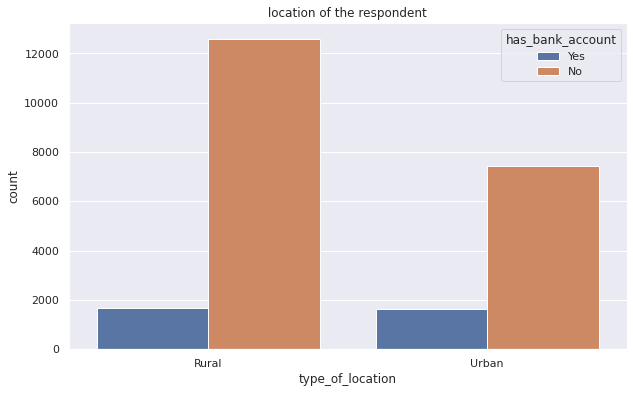

In [37]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='type_of_location', hue = 'has_bank_account')
ax.set_title(' location of the respondent ')

Most respondents were in rural areas. Its an interesting observation that people who had a bank account in both rural areas and urban were almost equal

Text(0.5, 1.0, ' Access to a mobile phone ')

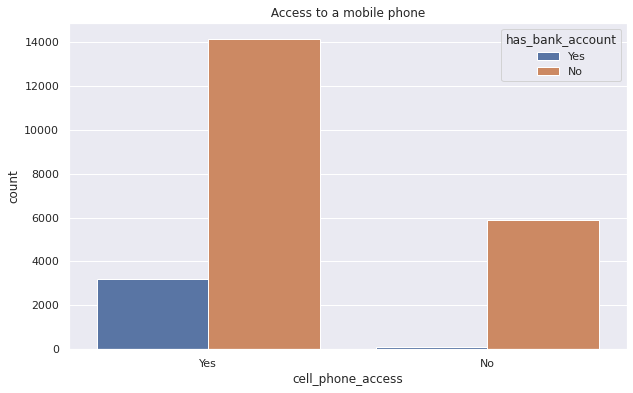

In [38]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='cell_phone_access', hue = 'has_bank_account')
ax.set_title(' Access to a mobile phone ')

Most respondents with access to a mobile phone have a bank account

Text(0.5, 1.0, ' Household Size ')

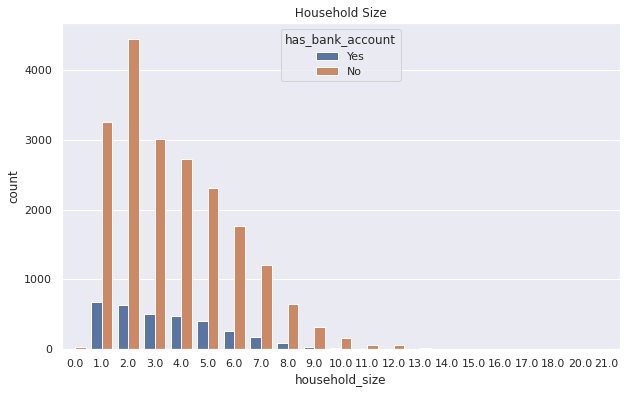

In [39]:
#household vs bank account 
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='household_size', hue = 'has_bank_account')
ax.set_title(' Household Size ')

Majority of the respondent in smaller households had a bank account


Text(0.5, 1.0, ' Respondent Age Distribution')

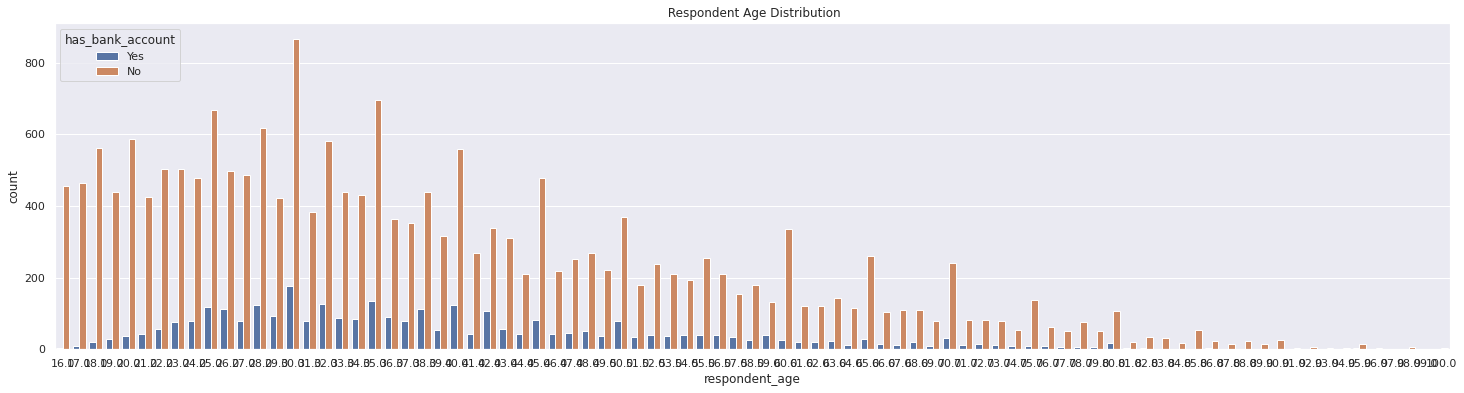

In [40]:
plt.figure(figsize=(25,6))
ax = sns.countplot(data=Financial2, x='respondent_age', hue = 'has_bank_account')
ax.set_title(' Respondent Age Distribution')


Most of of the  respondents distribution  who have a bank account are majory the youth from 18-34


Text(0.5, 1.0, ' Respondent Gender ')

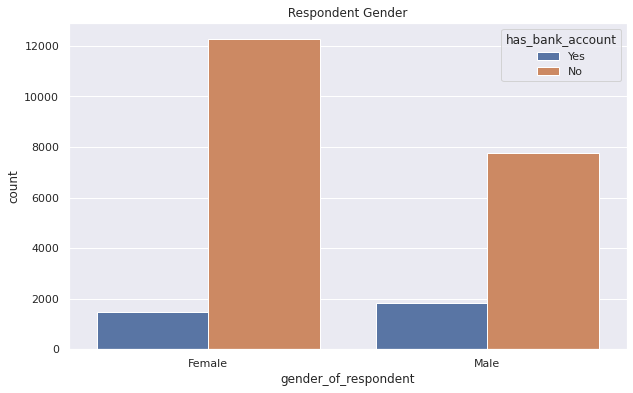

In [41]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='gender_of_respondent', hue = 'has_bank_account')
ax.set_title(' Respondent Gender ')

most men have a bank account

Text(0.5, 1.0, ' Relationship with the Head ')

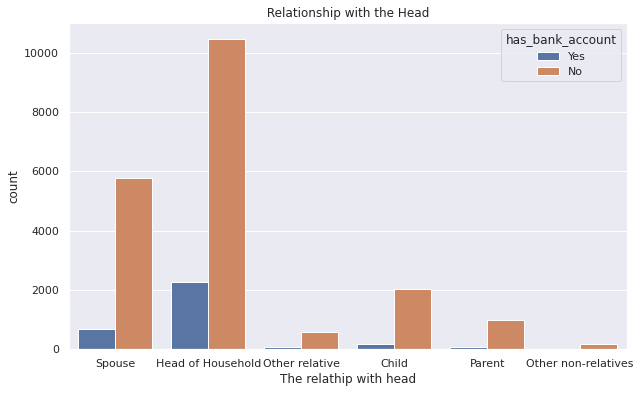

In [42]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='The relathip with head', hue = 'has_bank_account')
ax.set_title(' Relationship with the Head ')

Most household heads have access to a bank account

Text(0.5, 1.0, ' marital status ')

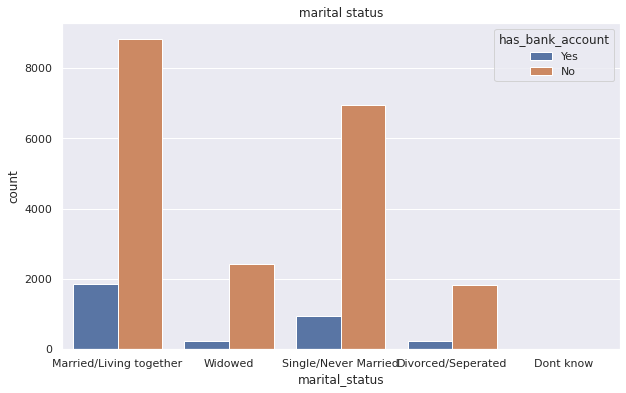

In [43]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=Financial2, x='marital_status', hue = 'has_bank_account')
ax.set_title(' marital status ')

Most couples/married respondents have a bank account

Text(0.5, 1.0, 'Respondents level of Education')

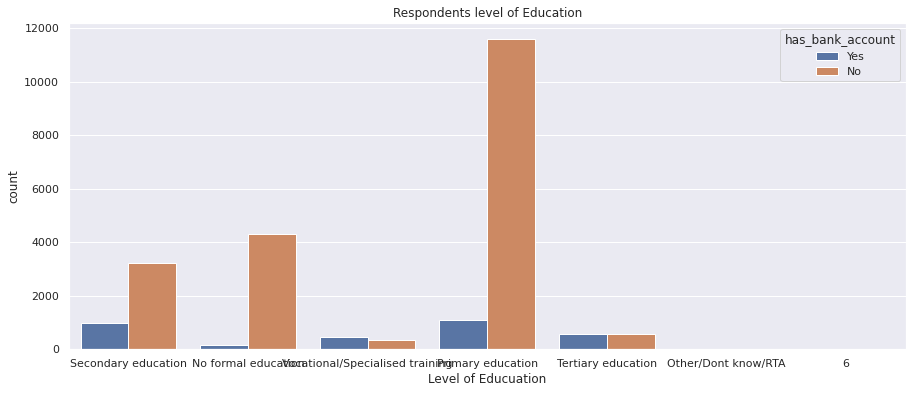

In [44]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=Financial2, x='Level of Educuation', hue = 'has_bank_account')
ax.set_title('Respondents level of Education')

Even though the majority of primary school dropout had a bank account, its not enough to make a conclusion. Its advisable to look at the proportionality/ratio of the distribution to make a comprehensive conclusion

Text(0.5, 1.0, ' Type of Job')

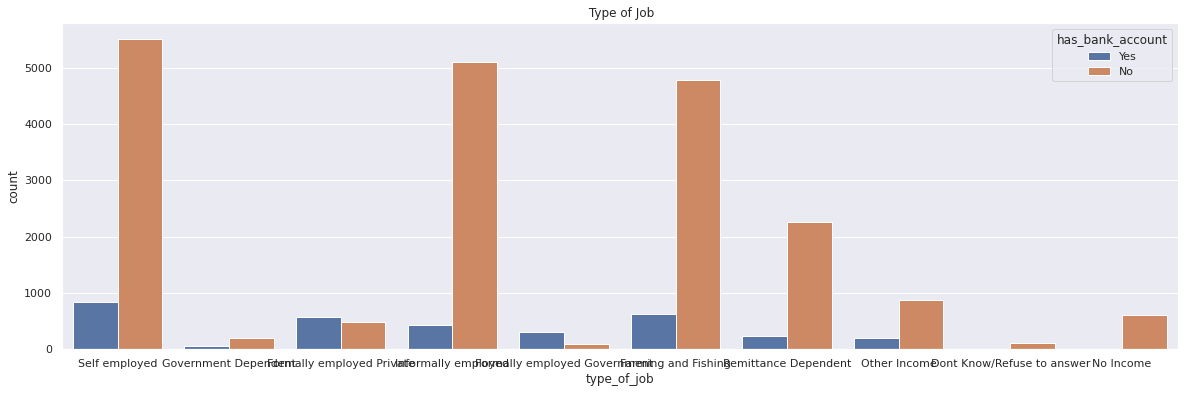

In [45]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data=Financial2, x='type_of_job', hue = 'has_bank_account')
ax.set_title(' Type of Job')

There is a slight difference in the distribution of the bank account ownership accross various sector of employment for the respondent

#Multivariate Analysis

In [46]:

#encoding categorial variables with LabelEncoder
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
Financial2['country']= en.fit_transform(Financial2['country'])
Financial2['year']= en.fit_transform(Financial2['year'])
Financial2['has_bank_account']= en.fit_transform(Financial2['has_bank_account'])
Financial2['type_of_location']= en.fit_transform(Financial2['type_of_location'])
Financial2['cell_phone_access']= en.fit_transform(Financial2['cell_phone_access'])
Financial2['gender_of_respondent']= en.fit_transform(Financial2['gender_of_respondent'])
Financial2['The relathip with head']= en.fit_transform(Financial2['The relathip with head'])
Financial2['marital_status']= en.fit_transform(Financial2['marital_status'])
Financial2['Level of Educuation']= en.fit_transform(Financial2['Level of Educuation'])
Financial2['type_of_job']= en.fit_transform(Financial2['type_of_job'])
print(Financial2)


       country  year       uniqueid  has_bank_account  type_of_location  \
0            0     2     uniqueid_1                 1                 0   
1            0     2     uniqueid_2                 0                 0   
2            0     2     uniqueid_3                 1                 1   
3            0     2     uniqueid_4                 0                 0   
4            0     2     uniqueid_5                 0                 1   
...        ...   ...            ...               ...               ...   
23519        3     2  uniqueid_2113                 0                 0   
23520        3     2  uniqueid_2114                 0                 0   
23521        3     2  uniqueid_2115                 0                 0   
23522        3     2  uniqueid_2116                 0                 1   
23523        3     2  uniqueid_2117                 0                 0   

       cell_phone_access  household_size  respondent_age  \
0                      1             3.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [47]:
#subsetting data
#Dropping uniqueid column since it has high cardinality
df = Financial2.drop(columns='uniqueid')


In [48]:
# correration matrix
corrMatrix = df.corr()
corrMatrix

,country,year,has_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,type_of_job
country,1.000000,-0.096633,-0.161003,0.149778,-0.149278,-0.158260,-0.058523,-0.027054,0.130225,0.008627,-0.051201,0.379521
year,-0.096633,1.000000,0.112905,0.214677,-0.066308,-0.052352,-0.018800,0.000214,0.001615,-0.027132,0.174367,0.266510
has_bank_account,-0.161003,0.112905,1.000000,0.088731,0.209520,-0.023050,0.019645,0.116153,-0.069969,-0.038855,0.322940,-0.063235
type_of_location,0.149778,0.214677,0.088731,1.000000,-0.083583,-0.274053,-0.047647,0.013313,0.016426,0.079271,0.127404,0.367255
cell_phone_access,-0.149278,-0.066308,0.209520,-0.083583,1.000000,0.098194,-0.104016,0.102205,-0.048695,-0.094389,0.252394,-0.144735
household_size,-0.158260,-0.052352,-0.023050,-0.274053,0.098194,1.000000,-0.119709,0.010139,0.088651,-0.110986,-0.008248,-0.180291
respondent_age,-0.058523,-0.018800,0.019645,-0.047647,-0.104016,-0.119709,1.000000,0.013336,-0.150320,0.221753,-0.352995,-0.103203
gender_of_respondent,-0.027054,0.000214,0.116153,0.013313,0.102205,0.010139,0.013336,1.000000,-0.472370,-0.102639,0.119476,-0.030363
The relathip with head,0.130225,0.001615,-0.069969,0.016426,-0.048695,0.088651,-0.150320,-0.472370,1.000000,-0.142725,-0.017648,0.040500
marital_status,0.008627,-0.027132,-0.038855,0.079271,-0.094389,-0.110986,0.221753,-0.102639,-0.142725,1.000000,-0.122349,0.055197


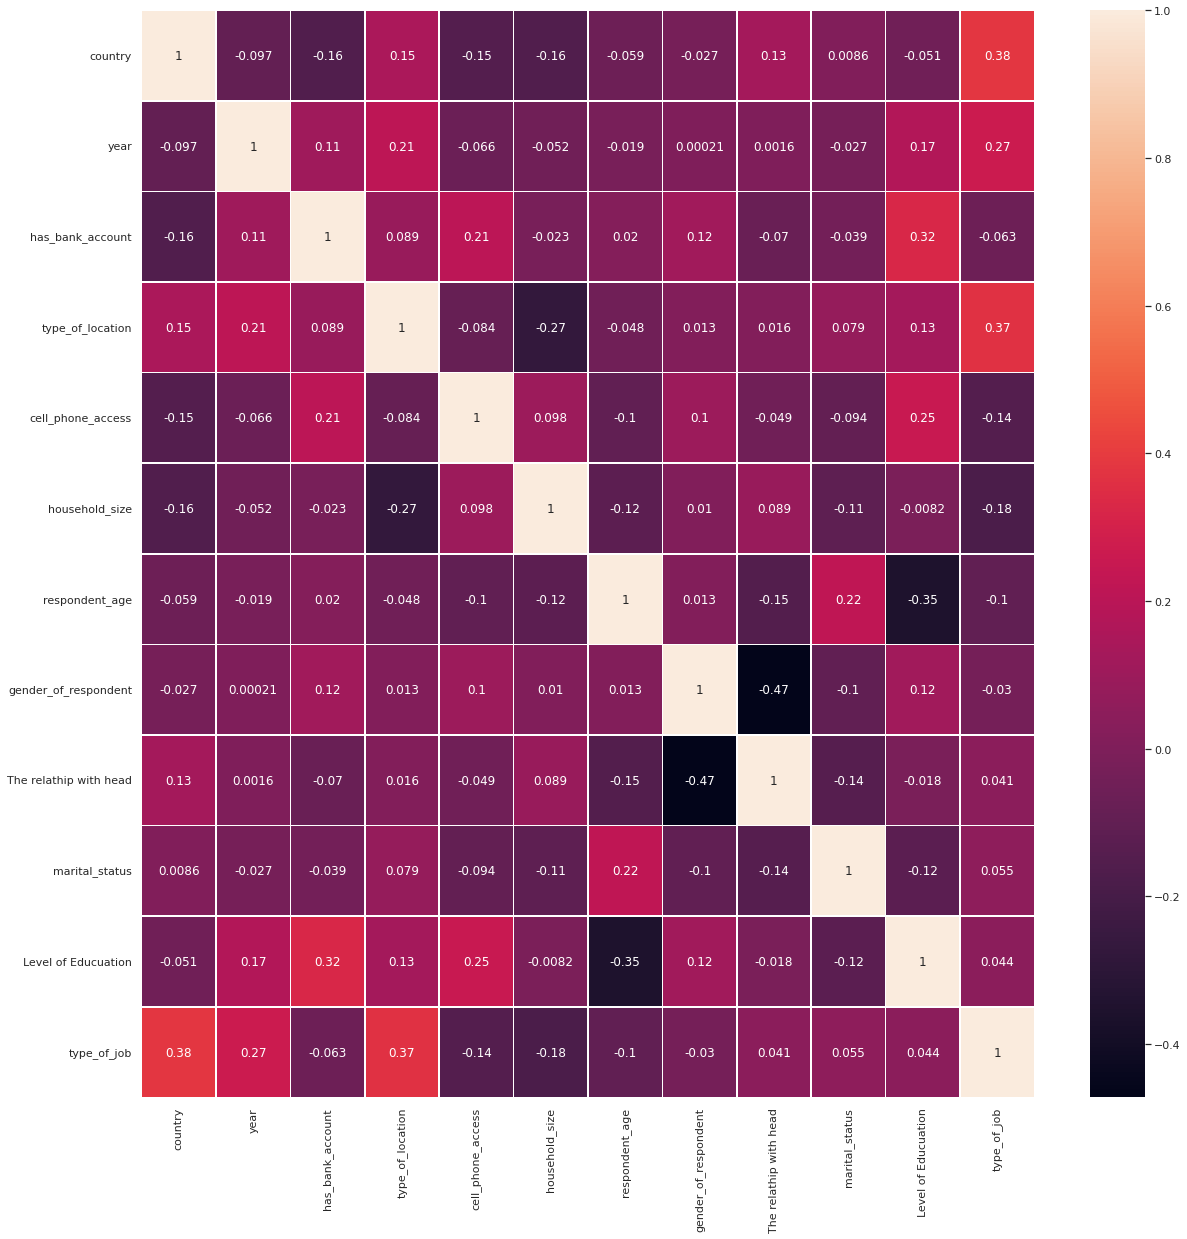

In [49]:
#visualizing correlation matrix using heatmap
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corrMatrix, annot=True, linewidths=0.5, ax=ax)

Type of job, level of education , country,and type of location of the respondent are perfectly correlated with the ability to have access to a bank account.

In [50]:
#separating target variables from the rest of the features
x = df.drop(columns ='has_bank_account')
y = 'has_bank_account'
x.head()

,country,year,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,type_of_job
0,0,2,0,1,3.0,24.0,0,5,2,4,9
1,0,2,0,0,5.0,70.0,0,1,4,1,4
2,0,2,1,1,5.0,26.0,1,3,3,6,9
3,0,2,0,1,5.0,34.0,0,1,2,3,3
4,0,2,1,0,8.0,26.0,1,0,3,3,5


In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
 # creating an instance
lda = LDA()
lda_= lda.fit(x,y)

lda_.fit = lda_.transform[x,y]
#displaying coefficient
lda_.coef_




ValueError: ignored